# Project 2: Investigate a Dataset

### I have chosen to investigate the Titanic data that contains information from 891 of the 2224 passengers and crew on board the Titanic.

### Questions to investigate:
   ** What factors made people more likely to survive? **
       1. Did women and children really come first, i.e. did women and children survive at a higher rate compared to men?
           This can be broken down into comparing the 'Sex' and 'Age' fields.
           
       2. Did passenger class impact a passenger's chance to survive?
              
    

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [156]:
# Read the titanic data into a DataFrame

titanic_df = pd.read_csv('titanic_data.csv')

In [157]:
# Look at basic information about the dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [158]:
# As the NaN values show below, some passengers have null values for their age (177 to be exact)

print titanic_df['Age'].head(20)
print ''
print 'Number of passengers with NaN values in the Age field:'
print titanic_df['Age'].isnull().sum()

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

Number of passengers with NaN values in the Age field:
177


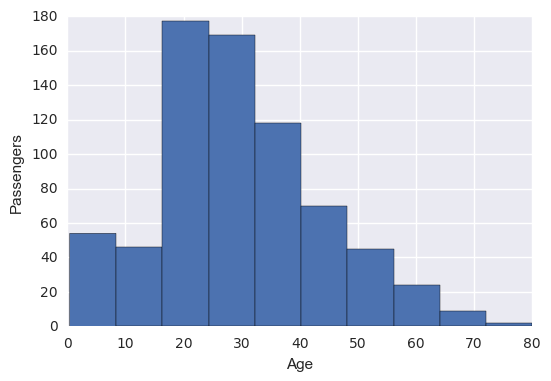

In [159]:
# It appears that the pandas built in .hist() function will drop the null values

plot1 = titanic_df['Age'].hist()

plot1.set_xlabel('Age')
plot1.set_ylabel('Passengers')

In [160]:
# I decided to fill missing age values with the mean age, you can see the NaN values have been replaced with the mean (29.699118)
titanic_df['Age'] = titanic_df['Age'].fillna(value=titanic_df['Age'].mean())

titanic_df['Age'].head(20)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
Name: Age, dtype: float64

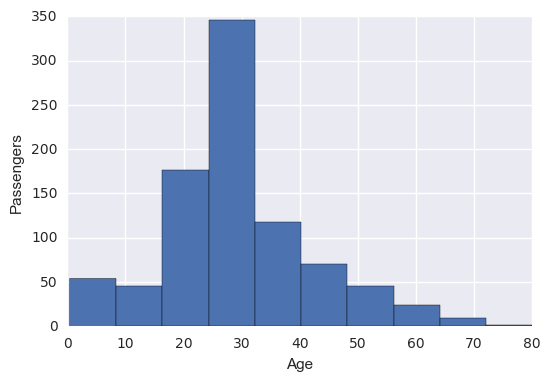

In [161]:
# Plotting the histogram again with the null values replaced shows a clear spike around the mean age

plot2 = titanic_df['Age'].hist()

plot2.set_xlabel('Age')
plot2.set_ylabel('Passengers')

In [162]:
# Create 3 new datafames of males/females and children (a child is defined as someone who is less than 18 years old) 
# and print the number of each

male = titanic_df[titanic_df['Sex'] == 'male']
print 'Number of males:'
print male['PassengerId'].count()

female = titanic_df[titanic_df['Sex'] == 'female']
print ''
print 'Number of females:'
print female['PassengerId'].count()

children = titanic_df[titanic_df['Age'] < 18]
print ''
print 'Number of children:'
print children['PassengerId'].count()

Number of males:
577

Number of females:
314

Number of children:
113


In [163]:
# Create 2 new datafames of people who did not survive (dead) and those who did (alive)

dead = titanic_df[titanic_df['Survived'] == 0]
alive = titanic_df[titanic_df['Survived'] == 1]

In [164]:
# Male survival rate

male_survivors = float((alive['Sex'] == 'male').sum())
print 'Number of male survivors'
print male_survivors
male_passengers = float(male['PassengerId'].count())
male_survival_rate = male_survivors / male_passengers
print ''
print 'Male survival rate:'
print male_survival_rate

Number of male survivors
109.0

Male survival rate:
0.188908145581


In [165]:
# Female survival rate

female_survivors = float((alive['Sex'] == 'female').sum())
print 'Number of female survivors'
print female_survivors
female_passengers = float(female['PassengerId'].count())
female_survival_rate = female_survivors / female_passengers
print ''
print 'Female survival rate:'
print female_survival_rate

Number of female survivors
233.0

Female survival rate:
0.742038216561


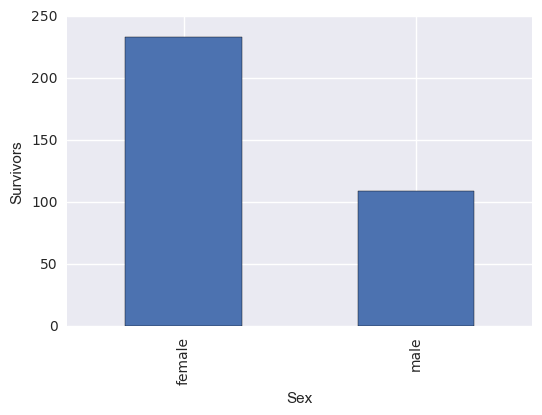

In [166]:
# Bar plot of showing number of survivors by sex

titanic_df.groupby(['Sex'])[['Survived']].sum().plot(kind='bar', legend=False).set_ylabel('Survivors')

In [167]:
# Child survival rate (a child is defined as someone who is less than 18 years old)

child_survivors= float((alive['Age'] < 18).sum())
print 'Number of child survivors'
print child_survivors
child_passengers = float(children['PassengerId'].count())
child_survival_rate = child_survivors / child_passengers
print ''
print 'Child survival rate:'
print child_survival_rate

Number of child survivors
61.0

Child survival rate:
0.53982300885


In [168]:
# Count of passengers by passenger class

titanic_df.groupby(['Pclass'])[['PassengerId']].count()

,PassengerId
Pclass,
1,216
2,184
3,491


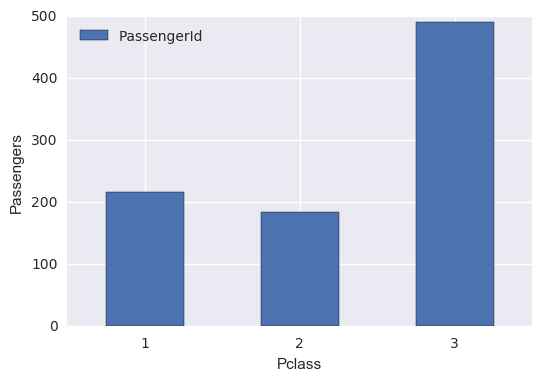

In [169]:
# Bar plot of passengers by passenger class

titanic_df.groupby(['Pclass'])[['PassengerId']].count().plot(kind='bar', rot=0).set_ylabel('Passengers')

In [170]:
# Number of survivors by passenger class

titanic_df.groupby(['Pclass'])[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


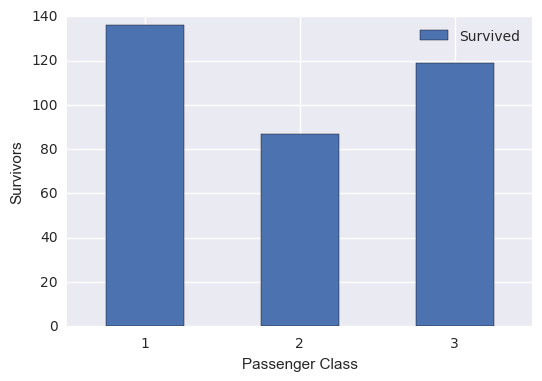

In [171]:
# Bar plot of survivors by passenger class

plot3 = titanic_df.groupby(['Pclass'])[['Survived']].sum().plot(kind='bar', rot=0)

plot3.set_xlabel('Passenger Class')
plot3.set_ylabel('Survivors')

In [172]:
# Survival rate broken down by passenger class

titanic_df.groupby(['Pclass'])[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


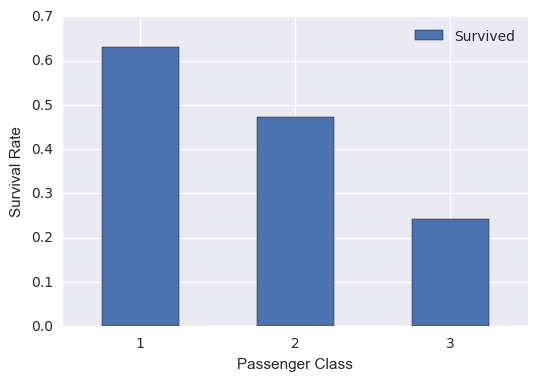

In [173]:
# Bar plot of survival rate by passenger class

plot4 = titanic_df.groupby(['Pclass'])[['Survived']].mean().plot(kind='bar', rot=0)

plot4.set_xlabel('Passenger Class')
plot4.set_ylabel('Survival Rate')

In [174]:
# Survival rate broken down by passenger class and by sex

titanic_df.groupby(['Pclass', 'Sex'])[['Survived']].mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

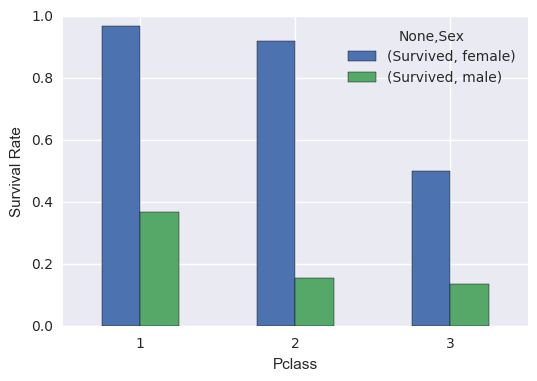

In [175]:
# Bar graph showing survival rate of passengers by passenger class with female as the blue bar and male as the green bar


titanic_df.groupby(['Pclass', 'Sex'])[['Survived']].mean().unstack().plot(kind='bar', rot=0).set_ylabel('Survival Rate')

### Conclusions:

Let's again look at the questions we are trying to answer.

** What factors made people more likely to survive? **
   ** What factors made people more likely to survive? **
       1. Did women and children really come first, i.e. did women and children survive at a higher rate compared to men?
           This can be broken down into comparing the 'Sex' and 'Age' fields.
           
       2. Did passenger class impact a passenger's chance to survive?

1. The female survival rate of 0.74 and child survival rate of 0.54 is higher than the male survival rate of 0.19

2. Passengers in 1st class had a survival rate of 0.63, greater than the survival rate of 2nd class 0.47 and greater than the survival rate of 3rd class 0.24.  

    I also looked at the survival rate of passenger class by sex, which again shows the survival rate of women higher than men and 1st class greater than 2nd class and greater than 3rd class. I thought it was interesting that the survival rate of women in 1st and 2nd class was 0.97 and 0.92 respectively.
    
   
   
   These findings are based on data from 891 (about 40%) of the total passengers and crew from the Titanic. No hypothesis testing has been performed to show the significance of any variables.
   
   
** Websites used for reference: **
   1. Main titanic kaggle site: https://www.kaggle.com/c/titanic
   2. Omar El Gabry's submission: https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
   3. Pandas documentation on visualizations: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html